In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd

#Read IND_data.csv into a Dataframe, assigned to df
df= pd.read_csv("kyphosis.csv")

df
#df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


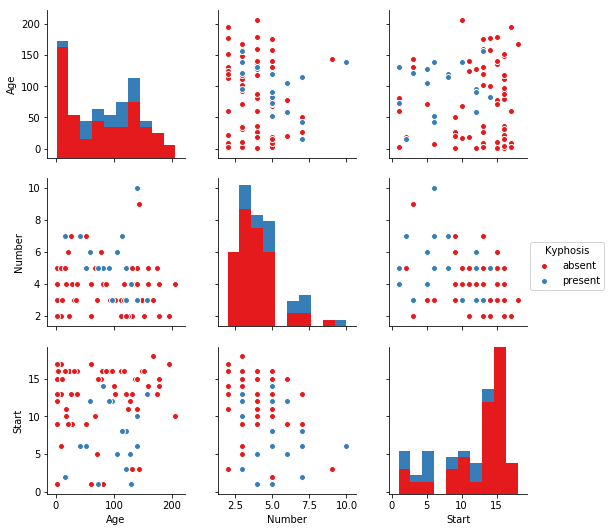

In [3]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [4]:
# Train

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
#Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree= DecisionTreeClassifier()

In [11]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
##Prediction and evaluation

In [17]:
predictions= dtree.predict(x_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       1.00      0.95      0.98        21
    present       0.80      1.00      0.89         4

avg / total       0.97      0.96      0.96        25



In [21]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features  =  list(df.columns[1:])
features

['Age', 'Number', 'Start']

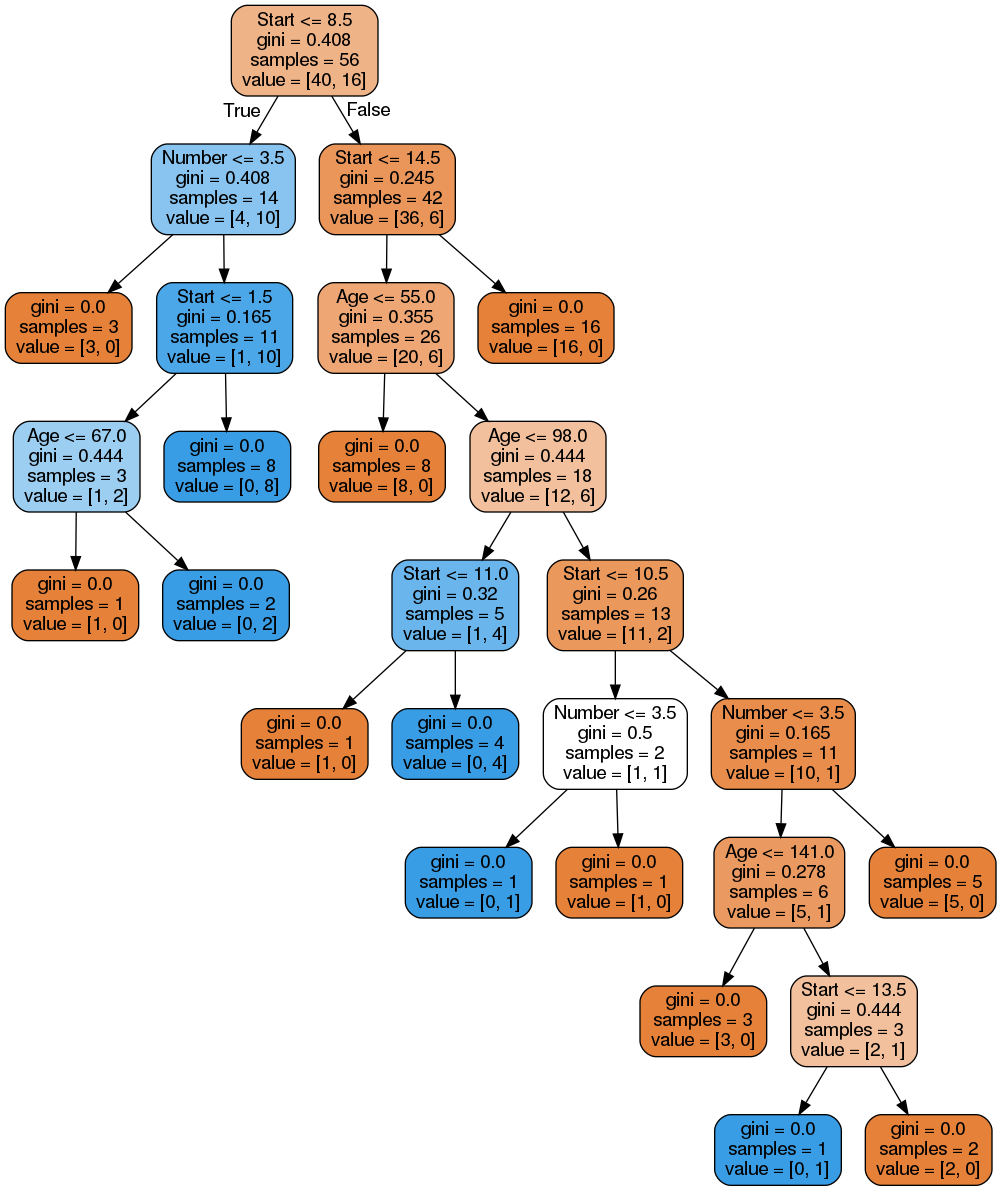

In [26]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,
                filled=True,rounded=True)

graph= pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
